<a href="https://colab.research.google.com/github/Mr-Moeen/iris-data-deep-learning/blob/main/Nural%20Network%20on%20iries%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split

In [71]:
import pandas as pd
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
df= pd.read_csv(url)
df.tail()


,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [72]:
# Example DataFrame operation, assuming df is your DataFrame
df['variety'] = df['variety'].replace('Setosa', 0.0)
df['variety'] = df['variety'].replace('Versicolor', 1.0)
df['variety'] = df['variety'].replace('Virginica', 2.0)

In [73]:
X = df.drop('variety', axis=1).values
y = df['variety'].values
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

# Convert arrays to PyTorch tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [79]:


# Define a simple neural network for classification
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(4, 10)  # Adjust according to your input features and desired output
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(10, 3)  # Assuming 3 classes for the output

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.layer2(x)
        return x

In [80]:
# Set the manual seed for reproducibility
torch.manual_seed(41)

# Initialize your model
model = Model()

In [81]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [82]:
# Training loop
epochs = 100
for i in range(epochs):
    optimizer.zero_grad()  # Zero the gradients before calculating the loss
    y_pred = model(X_train)  # Forward pass: compute the predicted y by passing x to the model
    loss = criterion(y_pred, y_train)  # Compute the loss
    loss.backward()  # Backward pass: compute gradient of the loss with respect to model parameters
    optimizer.step()  # Update model parameters

    if i % 10 == 0:
        print(f'Epoch {i}: Loss {loss.item()}')


Epoch 0: Loss 1.1523898839950562
Epoch 10: Loss 0.8625718951225281
Epoch 20: Loss 0.6164162755012512
Epoch 30: Loss 0.45480844378471375
Epoch 40: Loss 0.3594951331615448
Epoch 50: Loss 0.2827129065990448
Epoch 60: Loss 0.21961884200572968
Epoch 70: Loss 0.17287446558475494
Epoch 80: Loss 0.13931305706501007
Epoch 90: Loss 0.11541590839624405


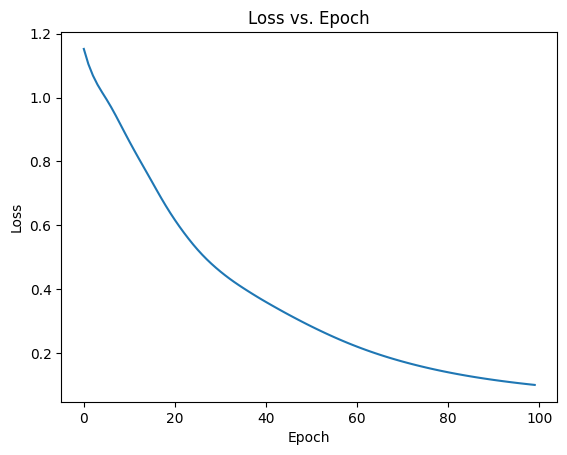

In [83]:
import matplotlib.pyplot as plt

# Assuming 'epochs' is the total number of epochs and 'losses' is the list of loss values
plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.show()
